In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
import numpy as np
from scipy.stats import normaltest, shapiro, kstest
from scipy.stats import kruskal
from scipy.stats import ttest_ind, t

Prepare data

In [10]:
df = pd.read_csv('data/DatasetEV2.csv')
df = df[df["85% IAB, 75%rest"] == 1] 

df["Form"] = df["Form"].map({
    "IAc_noncyano": "Form IA",
    "IAc_cyano": "Form IA",
    "IAq": "Form IA",
    "IB": "Form IB",
    "ICD": "Form ICD",
    "IE": "Form IE",
    "I_Anaero": "Form Anaero"
}) 

df.loc[:,"Form"] = pd.Categorical(df["Form"],
                                   categories=['Form IA', 'Form IB', 'Form ICD', 'Form IE', 'Form Anaero'],
                                   ordered=True)

df["Group"] = df["Form"].replace({"Form IA": "Green", "Form IB": "Green", "Form ICD": "Red", "Form IE": "Red", "Form Anaero": "Anaero"})


df["Rate mean [s-1]"] = df["Rate mean [s-1]"].astype(float)

dot_colors = {"Form IA": '#a8d6a8ff', "Form IB": '#6bb3adff', "Form ICD":'#f0b3b3ff', "Form IE":'#f76565ff', "Form Anaero":'#ccd6ffff'}
box_colors = {"Green": '#6db16dff', "Red": '#c54949ff', "Anaero":'#95a4e1ff'}


/var/folders/xl/__300bdj021f6jv0hgdjcrg40000gp/T/ipykernel_93357/239833018.py:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,"Form"] = pd.Categorical(df["Form"],


Statistical tests

In [11]:
pop1 = df[df['Group'] == 'Green']['Rate mean [s-1]'].dropna()
pop2 = df[df['Group'] == 'Red']['Rate mean [s-1]'].dropna()
pop3 = df[df['Group'] == 'Anaero']['Rate mean [s-1]'].dropna()

# Kruskal-Wallis test on the three populations
statistic, pvalue = kruskal(pop1, pop2, pop3)

# Check if the p-value is smaller than the significance level (alpha = 0.05)
if pvalue < 0.05:
    print(f'Kruskal-Wallis test: At least two populations are significantly different. p = {pvalue}')
else:
    print('Kruskal-Wallis test: All populations are not significantly different')

# t-values for each pair of populations
t1, p1 = ttest_ind(pop1, pop2)
t2, p2 = ttest_ind(pop1, pop3)
t3, p3 = ttest_ind(pop2, pop3)

# Calculate critical t-value
alpha = 0.05  # desired level of significance
degfree = len(pop1) + len(pop2) - 2  # degrees of freedom
critical_t = t.ppf(1 - alpha / 2, degfree)  # two-tailed test

# Compare calculated t-values to critical t-value
if abs(t1) > critical_t:
    print(f"Populations 1 and 2 are significantly different. p = {p1}")
if abs(t2) > critical_t:
    print(f"Populations 1 and 3 are significantly different. p = {p2}")
if abs(t3) > critical_t:
    print(f"Populations 2 and 3 are significantly different. p = {p3}")  

Kruskal-Wallis test: At least two populations are significantly different. p = 0.004731114641374671
Populations 1 and 2 are significantly different. p = 0.023267881517475927


Plot

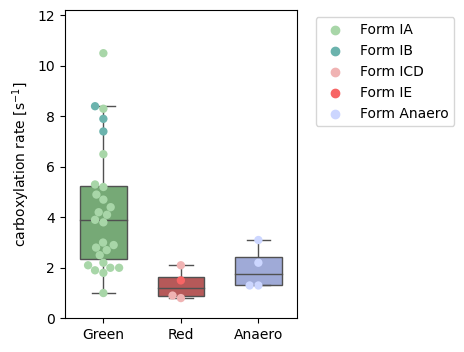

In [12]:
plt.figure(num=None, figsize=(3, 4))

ax = sns.boxplot(data=df, x="Group", y="Rate mean [s-1]", palette=box_colors, showfliers = False, linewidth=1, width=0.6)

sns.swarmplot(data=df, x="Group", y="Rate mean [s-1]", hue="Form", palette=dot_colors, size=6)

plt.ylabel('carboxylation rate [s$^{-1}$]')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 12.2)


plt.savefig(r'plots/green_red_anaero.svg', dpi=300, bbox_inches='tight')

plt.show()